# **MOVIE ANALYSIS**
Code Clause Project - TASK 1



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt


In [ ]:
credits_df = pd.read_csv('/content/drive/MyDrive/tmdb-5000-movie-dataset/tmdb_5000_credits.csv')
movies_df = pd.read_csv('/content/drive/MyDrive/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies_df = pd.merge(movies_df, credits_df, left_on ='id', right_on='movie_id', how='left', suffixes=('', '_y'))

movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [ ]:
del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title', 'title_y']

movies_df = movies_df.drop(del_col_list, axis=1)

In [ ]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')


In [ ]:
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 15)
(4803, 15)


In [ ]:
# Changing the data type of the below mentioned columns and 
change_cols=['budget', 'revenue']

movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                    int64
genres                   object
id                        int64
popularity              float64
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
title                    object
vote_average            float64
vote_count                int64
movie_id                  int64
cast                     object
crew                     object
dtype: object

In [ ]:
# release year
movies_df.release_date = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,profit,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,2009.0
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000,2007.0
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",635674609,2015.0
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",834939099,2012.0
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",24139100,2012.0


**most expensive movies**

In [ ]:
expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,profit,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,1865,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...",665713802,2011.0
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000,2007.0
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,99861,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",1125403694,2015.0
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,1452,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de...",121081192,2006.0
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",24139100,2012.0


**most profitable movies**

In [ ]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'title',
        'cast',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['budget'], ascending=False).head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
17,380000000,665713802,1045713802,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,2011.0,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...",6.4,4948
1,300000000,661000000,961000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007.0,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015.0,141.0,['English'],Avengers: Age of Ultron,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",7.3,6767
10,270000000,121081192,391081192,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,2006.0,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...",5.4,1400
4,260000000,24139100,284139100,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,2012.0,132.0,['English'],John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,2124


**most popular genre**

In [ ]:
#selecting the movies having profit $50M or more
profit_data = movies_df[movies_df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

In [ ]:
# formatting the data in the genres columns
profit_data['genres']=profit_data['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')

profit_data['genres']=profit_data['genres'].str.split(',')

profit_data.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,cast,vote_average,vote_count
1,237000000,2550965087,2787965087,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009.0,162.0,"['English', 'Español']",Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
2,300000000,661000000,961000000,"[Adventure, Fantasy, Action]",285,139.082615,['United States of America'],2007-05-19,2007.0,169.0,['English'],Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
3,245000000,635674609,880674609,"[Action, Adventure, Crime]",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,2015.0,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,4466
4,250000000,834939099,1084939099,"[Action, Crime, Drama, Thriller]",49026,112.312950,['United States of America'],2012-07-16,2012.0,165.0,['English'],The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,9106
5,258000000,632871626,890871626,"[Fantasy, Action, Adventure]",559,115.699814,['United States of America'],2007-05-01,2007.0,139.0,"['English', 'Français']",Spider-Man 3,"['Tobey Maguire', 'Kirsten Dunst', 'James Fran...",5.9,3576


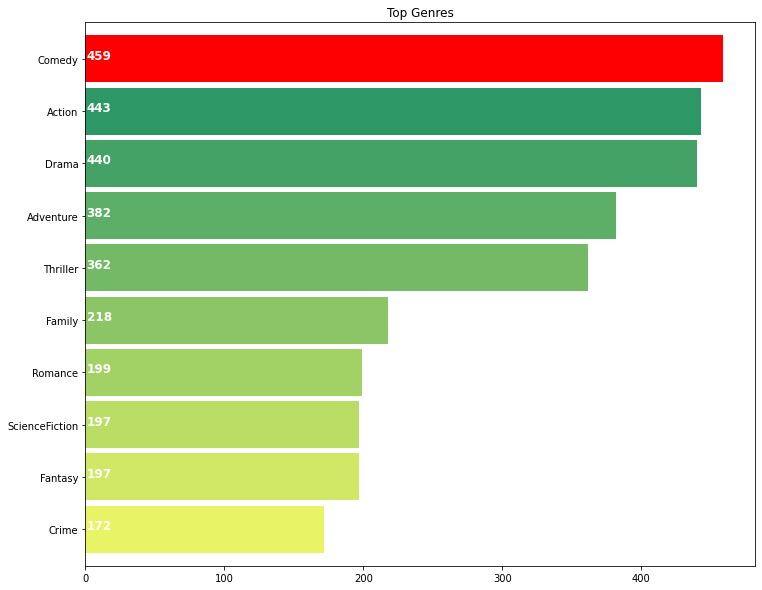

In [ ]:
plt.subplots(figsize=(12,10))
list1=[]

# extending the list to 
for i in profit_data['genres']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

**movie profit vs release year**

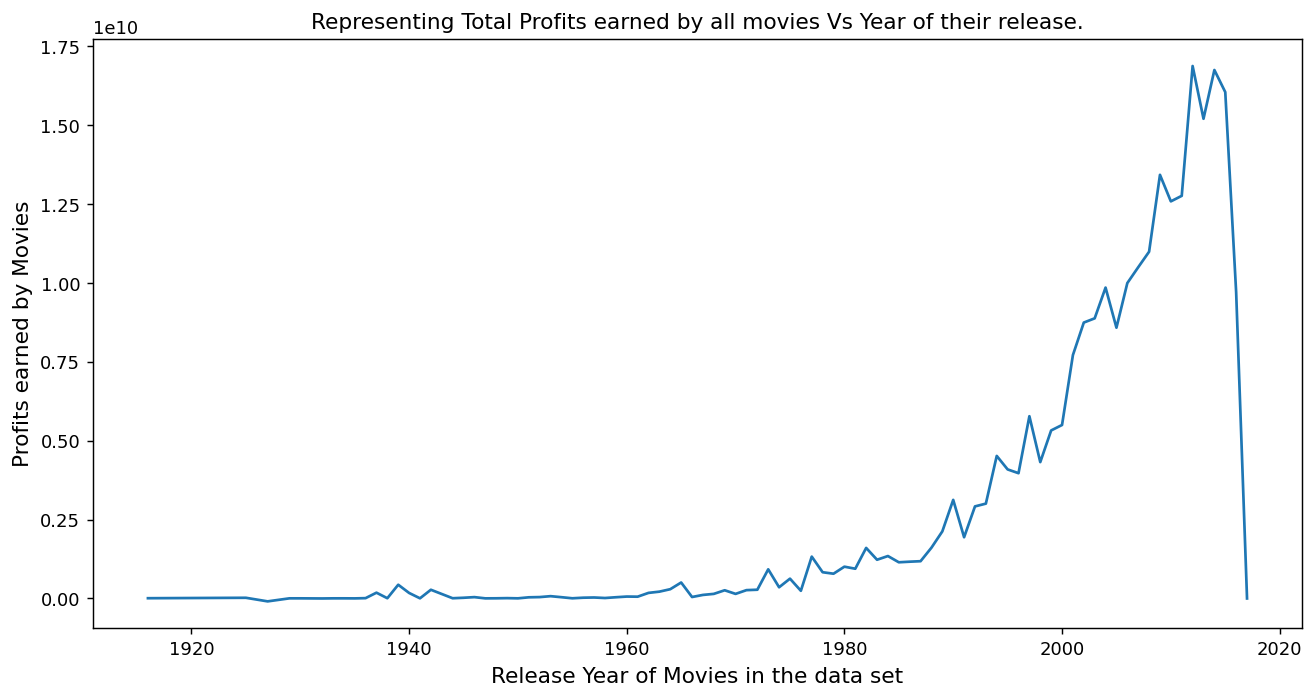

In [ ]:
profits_year = movies_df.groupby('release_year')['profit'].sum()

plt.figure(figsize=(12,6), dpi = 130)

# x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
# y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)

plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

plt.plot(profits_year)

plt.show()